<a href="https://colab.research.google.com/github/KozinIlya/Test-Study/blob/main/hakaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Предварительная обработка файлов 

In [ ]:
! gdown --id 1h7ucuKDH0ahS25pOYLxpsTjOG1xslg2e
! gdown --id 1HfD8OJxlkk5SACEz3p_012ScKleGwSIr
! gdown --id 1X5Y00TiKyG3bX0bsFHSIdo1fLQ6144O0
! gdown --id 1EURg5fr_f3h3YbtBfo80Nz8u90xGiJ2q
! gdown --id 16VvEOqkii2Meib-13yWgNDg4D1uyk37D
! gdown --id 1NrqSLeWIDG0kbfJ9PopDsgZnnzumwZNQ
! gdown --id 1XzH10zWZKZ799I7Ello4cjAw8idQNkvA
! gdown --id 16mRUk45RQ-hYY2uAYUy1LaHeGxUTUcNC
! gdown --id 1-ESbg-8TCZO7xBX0YYi7K5wFOtxOVP_1
! gdown --id 1aDBBJAD7OB8NlwA0mGmrHh60ORALkdTY
! gdown --id 10VVItq-0AQwKkx55xvEfPPZr-XaDBlUQ
! gdown --id 1REBIKcCU3c4fJFrNT4tF5z8-XxwfalpE
! gdown --id 1QIxbGEHR0BGzlm3cNtTZ8vXSYRKTRYmT
! gdown --id 1K73izS4bv4Zj2CFV5k5l9BSt-FfKP49j
! gdown --id 1ek0TqIC5ufvJhwAQPQBY7w5b6spcouV6

In [5]:
import pandas as pd
import numpy as np
import json
from pprint import pprint
from tqdm import tqdm
#from google.colab import drive
#drive.mount('drive', force_remount=True)

In [6]:
#функция для преобразования json в pandas
def parser(i):  
  data = [json.loads(line) for line in open(i,'r')] 
  df = pd.DataFrame(data)
  df.drop(['minjustRegNum','logo', 'statusDetail', 'charter', 'minjustStatus','oktmo',
         'administrators', 'okpo', 'address', 'successors', 'okogu',
         'kpp','addOkved', 'okato', 'okfs','website_punycode','shortName', 'predecessors', 
          'socialMedia', 'reports','dateOgrn','dateReg'],axis=1,  inplace=True)

  return df

In [7]:
files = ['/content/ngo_dump_01.json'
         ,'/content/Копия ngo_dump_02.json'
         ,'/content/Копия ngo_dump_03.json' 
         ,'/content/Копия ngo_dump_04.json'
         ,'/content/Копия ngo_dump_05.json'
         ,'/content/Копия ngo_dump_06.json'
         ,'/content/Копия ngo_dump_07.json'
         ,'/content/Копия ngo_dump_08.json'
         ,'/content/Копия ngo_dump_09.json'
         ,'/content/Копия ngo_dump_10.json'
         ,'/content/Копия ngo_dump_11.json'
         ,'/content/Копия ngo_dump_12.json'
         ,'/content/Копия ngo_dump_13.json'
         ,'/content/Копия ngo_dump_14.json'
         ,'/content/Копия ngo_dump_15.json'
         ]

In [8]:
from tqdm import tqdm

for j, i in tqdm(enumerate(files)):
  df_par = parser(i)
  t = str(j)
  df_par.to_csv(t + '.csv')
  


15it [01:39,  6.67s/it]


##Объединение фреймов и распарсивание вложенных JSON-файлов

In [9]:
import glob
files = glob.glob('*.csv')
combined = pd.DataFrame()

for file in tqdm(files):
    data = pd.read_csv(file)
    data['filename'] = file
    combined = pd.concat([combined, data], axis=0)
combined.head(2)

100%|██████████| 15/15 [00:10<00:00,  1.39it/s]


,Unnamed: 0,regionName,fullName,minjustForm,ogrn,opf,egrulStatus,mainOkved,regionCode,incomeTotal,email,incomeDetail,inn,originDate,website,dateLiquid,hasRegionalSupport,filename
0,0,Москва,"АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ""СПОРТИВ...",Автономная некоммерческая организация,1027739728697,{'name': 'Автономные некоммерческие организаци...,Действует,{'name': 'Деятельность в области спорта прочая...,77,270000.72,NaN,"{'grants': {'totalCount': 0, 'totalSum': 0}, '...",7.714119e+09,{'$date': '1997-12-31T00:00:00.000Z'},NaN,NaN,False,3.csv
1,1,Москва,"ДОБРОВОЛЬНАЯ, НЕЗАВИСИМАЯ, НЕКОММЕРЧЕСКАЯ ОРГА...","Объединения (союз, ассоциация) юридических лиц",1027739553368,"{'name': 'Ассоциации (союзы)', 'code': '20600'...",Действует,"{'name': 'Деятельность рекламных агентств', 'c...",77,0.00,NaN,"{'grants': {'totalCount': 0, 'totalSum': 0}, '...",7.710027e+09,{'$date': '1993-09-07T00:00:00.000Z'},NaN,NaN,False,3.csv


In [10]:
import json
def inc(s):
  if type(s) != float:
    json_acceptable_string = s.replace("'","\"")
    d = json.loads(json_acceptable_string)
    return(pd.Series([d['grants']['totalCount'], d['grants']['totalSum'],
                      d['fedSubsidies']['totalCount'], d['fedSubsidies']['totalSum'],
                      d['contracts44']['totalCount'], d['contracts44']['totalSum'],
                      d['contracts223']['totalCount'], d['contracts223']['totalSum'],
                      d['contracts94']['totalCount'], d['contracts94']['totalSum']
                      ]))
  else:
    return(pd.Series([""]))
def date_(s):
  if type(s) != float:
     json_acceptable_string = s.replace("'","\"")
     d = json.loads(json_acceptable_string)
     return(pd.Series([d['$date']]))
  else:
    return(pd.Series([""]))

def codes(s):
  json_acceptable_string = s.replace("'","\"").replace("None", "\"\"")
  d = json.loads(json_acceptable_string)
  return(pd.Series([d['name'], d['code']]))

In [11]:
income = combined['incomeDetail'].apply(inc)
income.columns = ['grantsTotalCount', 'grantsTotalSum',
                  'fedSubsidiesTotalCount','fedSubsidiesTotalSum',
                  'contracts44TotalCount','contracts44TotalSum',
                  'contracts223TotalCount','contracts223TotalSum',
                  'contracts94TotalCount','contracts94TotalSum'
                  ]

In [12]:
originDate = combined['originDate'].apply(date_)
originDate.columns = ['registrDate']

In [13]:
liquidDate = combined['dateLiquid'].apply(date_)
liquidDate.columns = ['liquidDate']


In [14]:
code_okved = combined['mainOkved'].apply(codes)
code_okved.columns = ['okvedName', 'okvedCode']


opf_codes = combined['opf'].apply(codes)
opf_codes.columns = ['opfName', 'opfCode']


In [ ]:
res_df = pd.concat([combined, income, originDate,opf_codes,code_okved,liquidDate], axis=1)
res_df.head(1)


In [ ]:
res = res_df.drop(['incomeDetail','originDate','dateLiquid','mainOkved','opf','Unnamed: 0'], axis=1)
res['okvedID'] = res['okvedCode'].str.replace(r'\D' , '')
res['registrDateYear'] = res['registrDate'].str[:4]
res['liquidDateYear'] = res['liquidDate'].str[:4]
res.head(1)

## Выгрузка обработанных на google-диск

In [17]:
#from google.colab import drive
#drive.mount('drive',force_remount=True)
#res.to_csv('hakaton.csv')
#!cp hakaton.csv "drive/My Drive/"

#Задание 1 
## есть ли зависимость вероятности получения грантов от государства / госконтрактов от региона регистрации организации

In [118]:
regions_df = res.drop(['ogrn',
       'regionCode', 'incomeTotal', 'email', 'website',
        'filename','registrDate',
        'opfCode',  'liquidDate',
       'okvedID'], axis = 1)

with_support_df = regions_df[regions_df['grantsTotalCount'] > 0] #оставляем только компании имеющие гранты

In [119]:
#получаем список оквед когда-либо получавших гранты
Grants_okvd_list = list(with_support_df.okvedCode.unique())


In [120]:
#Оставляем в основном файле только компании с ОКВЭД, по которым когда-либо получали гранты
potent_support_df = regions_df.loc[regions_df['okvedCode'].isin(Grants_okvd_list)]


In [121]:
#Функция для разметки получала ли компания грант или нет
def bools(s):
  if s == 0:
    return 'grants_no'
  else:
    return 'grants_yes'

In [122]:
potent_support_df['subsidiesTotalCount'] = potent_support_df['grantsTotalCount'] + potent_support_df['fedSubsidiesTotalCount']
potent_support_df['subsidiesTotalSum'] = potent_support_df['grantsTotalSum'] + potent_support_df['fedSubsidiesTotalSum']
potent_support_df['grants'] = potent_support_df['subsidiesTotalCount'].apply(bools)
potent_support_df.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,regionName,fullName,minjustForm,egrulStatus,inn,hasRegionalSupport,grantsTotalCount,grantsTotalSum,fedSubsidiesTotalCount,fedSubsidiesTotalSum,...,contracts94TotalCount,contracts94TotalSum,opfName,okvedName,okvedCode,registrDateYear,liquidDateYear,subsidiesTotalCount,subsidiesTotalSum,grants
0,Москва,"АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ""СПОРТИВ...",Автономная некоммерческая организация,Действует,7.714119e+09,False,0.0,0.0,0.0,0.0,...,0.0,0.0,Автономные некоммерческие организации,Деятельность в области спорта прочая,93.19,1997,,0.0,0.0,grants_no


в среднем по стране гранты получают: 2.26%



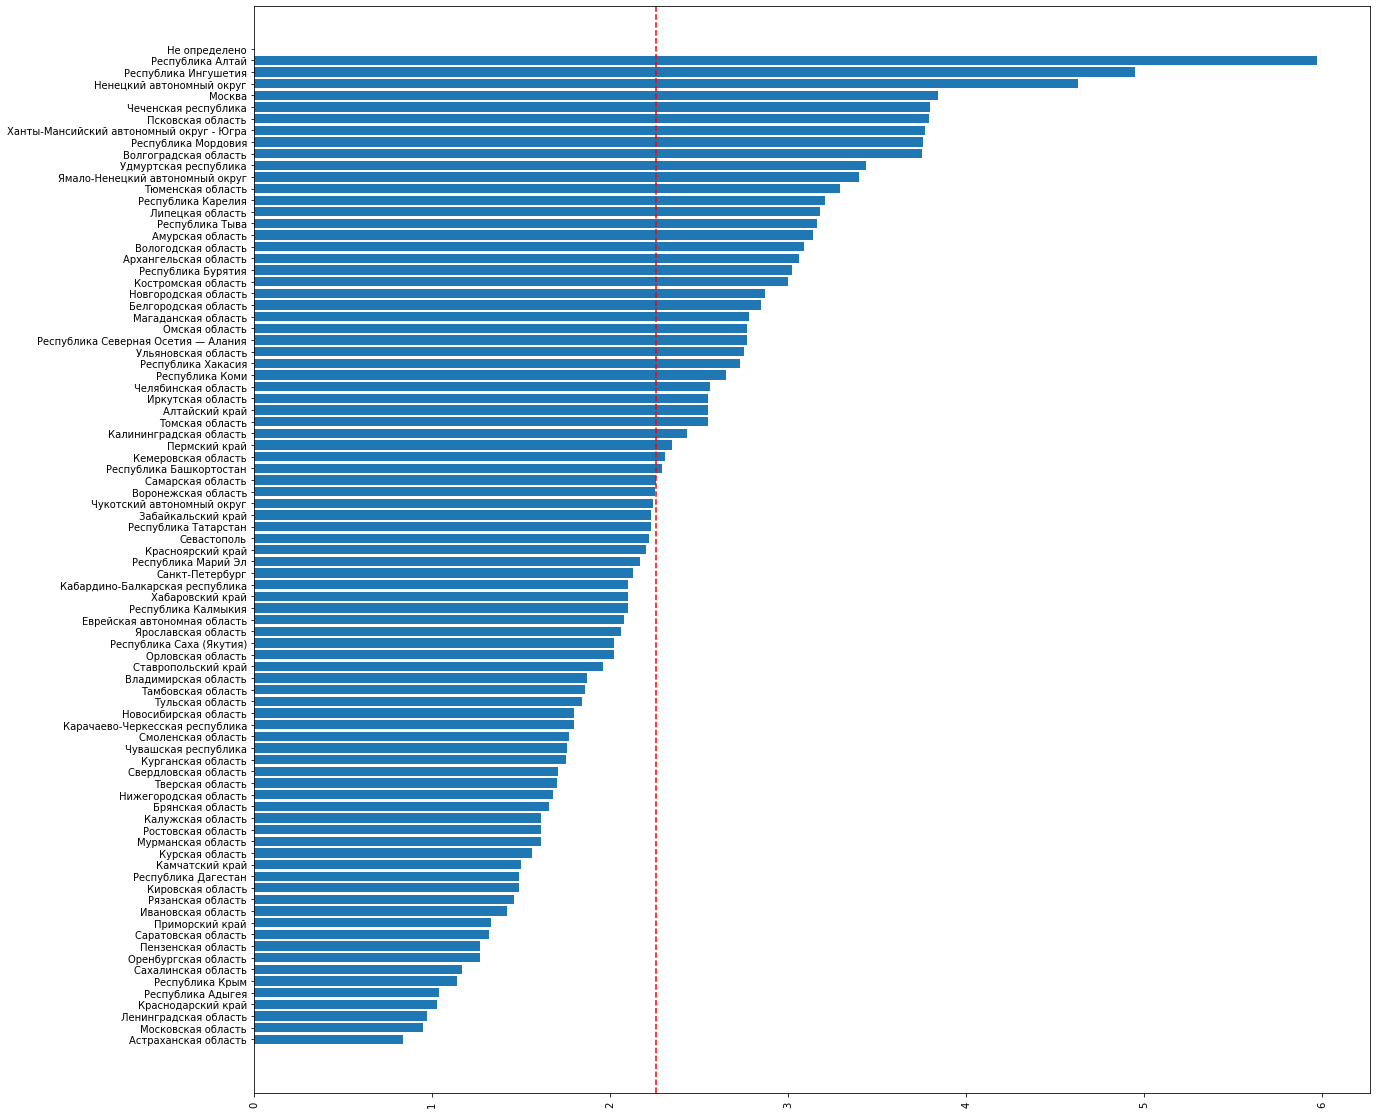

In [123]:
import matplotlib.pyplot as plt
pivot_reg = pd.pivot_table(potent_support_df,
               index = 'regionName',
               columns = 'grants',
               values = 'inn',
               aggfunc = 'count'
               ).reset_index()
pivot_reg['total'] = pivot_reg['grants_yes'] + pivot_reg['grants_no']
pivot_reg['persent'] = round((pivot_reg['grants_yes'] / pivot_reg['total'] * 100), 2)

po_strane = round(((pivot_reg['grants_yes'].sum() / pivot_reg['total'].sum())*100), 2)
print(f"в среднем по стране гранты получают: {po_strane}%\n") 
t = pivot_reg.sort_values('persent', ascending=True)
x = t['regionName']
y = t['persent']
plt.figure(figsize=(20, 20))
plt.xticks(rotation=90)
plt.barh(x, y)
plt.axvline(x=2.26, color='r', linestyle='--')


# Задание 3
## Проверить, есть ли зависимость вероятности получения грантов от государства / госконтрактов от экономической деятельности

In [100]:
res3 = res.copy()
res3.head(2)

,regionName,fullName,minjustForm,ogrn,egrulStatus,regionCode,incomeTotal,email,inn,website,...,contracts94TotalSum,registrDate,opfName,opfCode,okvedName,okvedCode,liquidDate,okvedID,registrDateYear,liquidDateYear
0,Москва,"АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ""СПОРТИВ...",Автономная некоммерческая организация,1027739728697,Действует,77,270000.72,NaN,7.714119e+09,NaN,...,0.0,1997-12-31T00:00:00.000Z,Автономные некоммерческие организации,71400,Деятельность в области спорта прочая,93.19,,9319,1997,
1,Москва,"ДОБРОВОЛЬНАЯ, НЕЗАВИСИМАЯ, НЕКОММЕРЧЕСКАЯ ОРГА...","Объединения (союз, ассоциация) юридических лиц",1027739553368,Действует,77,0.00,NaN,7.710027e+09,NaN,...,0.0,1993-09-07T00:00:00.000Z,Ассоциации (союзы),20600,Деятельность рекламных агентств,73.11,,7311,1993,


In [101]:
def bools1(s):
  if s == 0:
    return 0
  else:
    return 1

In [102]:
df_3 = res3.drop(['regionName', 'ogrn', 'egrulStatus',
       'regionCode', 'email', 'website',
       'hasRegionalSupport', 'filename', 'grantsTotalSum',
        'fedSubsidiesTotalSum','regionCode',
       'contracts44TotalCount', 'contracts44TotalSum',
       'contracts223TotalCount', 'contracts223TotalSum',
       'contracts94TotalCount', 'contracts94TotalSum', 'registrDate',
        'opfCode', 'okvedCode', 'liquidDate', 'okvedID',
       'registrDateYear', 'liquidDateYear'], axis=1)

df_3['TotalCount'] = df_3['grantsTotalCount'] +df_3['fedSubsidiesTotalCount']
df_3['factSupport'] = df_3['TotalCount'].apply(bools1)

In [103]:
#не получали гос. финансирование
without_fin = df_3[df_3['TotalCount'] == 0]['opfName'].unique()


In [104]:
with_fin = df_3[df_3['TotalCount'] >= 0]  
with_fin.head(1)

,fullName,minjustForm,incomeTotal,inn,grantsTotalCount,fedSubsidiesTotalCount,opfName,okvedName,TotalCount,factSupport
0,"АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ""СПОРТИВ...",Автономная некоммерческая организация,270000.72,7.714119e+09,0.0,0.0,Автономные некоммерческие организации,Деятельность в области спорта прочая,0.0,0


In [105]:
agg_func_math = {'factSupport': ['sum', 'count']}
df = with_fin.groupby(['opfName'],group_keys=False).agg(agg_func_math).reset_index()
df.columns = df.columns.map('|'.join).str.strip('|')
df['coef'] = round(df['factSupport|sum'] / df['factSupport|count'], 4)
df.columns = ['Деятельность по ОПФ', 'Кол-во орг. получавших гранты/субсидии','Количество организаций', 'Доля орг. получающих гранты/субсидии']
t = df.sort_values(by= 'Кол-во орг. получавших гранты/субсидии', ascending=False)
t.head(15)

,Деятельность по ОПФ,Кол-во орг. получавших гранты/субсидии,Количество организаций,Доля орг. получающих гранты/субсидии
153,Общественные организации,5080,75444,0.0673
10,Автономные некоммерческие организации,3170,46121,0.0687
25,Благотворительные фонды,925,15156,0.0610
264,Фонды,820,12191,0.0673
268,Частные учреждения,602,25682,0.0234
18,Ассоциации (союзы),483,13486,0.0358
199,Религиозные организации,408,33755,0.0121
120,Некоммерческие партнерства,402,21011,0.0191
155,Общественные фонды,389,5405,0.0720
152,Общественные движения,232,3141,0.0739


In [106]:
##по ОКВЕД для ОПФ "общественная организация"
df_unknown = with_fin[with_fin['opfName'] == 'Общественные организации']

df_org = df_unknown.groupby(['okvedName'],group_keys=False).agg(agg_func_math).reset_index()
df_org.columns = df_org.columns.map('|'.join).str.strip('|')
df_org['coef'] = df_org['factSupport|sum'] / df_org['factSupport|count']
df_org.columns = ['Деятельность по ОКВЭД', 'Кол-во орг. получавших гранты/субсидии ','Количество организаций', 'Доля орг. получающих гранты/субсидии']
df_org.sort_values(by= 'Количество организаций', ascending=False)

,Деятельность по ОКВЭД,Кол-во орг. получавших гранты/субсидии,Количество организаций,Доля орг. получающих гранты/субсидии
123,"Деятельность прочих общественных организаций, ...",4238,55887,0.075832
0,,99,6101,0.016227
49,Деятельность в области спорта прочая,161,4225,0.038107
130,Деятельность спортивных клубов,23,1157,0.019879
119,Деятельность профессиональных членских организ...,125,1087,0.114995
...,...,...,...,...
191,Подготовка строительной площадки,0,1,0.000000
192,Предоставление посреднических услуг при оценке...,0,1,0.000000
193,Предоставление посреднических услуг при оценке...,0,1,0.000000
194,Предоставление прочих персональных услуг,0,1,0.000000


#### Выгрузка обработанных на google-диск

In [107]:
#по ОПФ
#drive.mount('drive', force_remount=True)
#df.to_csv('zadanie3.csv')
#!cp zadanie3.csv "drive/My Drive/"

In [108]:
#по ОКВЕД для ОПФ "общественная организация"
#drive.mount('drive', force_remount=True)
#df_org.to_csv('zadanie3-1.csv')
#!cp zadanie3-1.csv "drive/My Drive/"

##файл от Бориса к заданию3 

In [109]:
! gdown --id  1RmtedZ-Br7BtiUqTjIUEkJdQ7eOBeW52

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1RmtedZ-Br7BtiUqTjIUEkJdQ7eOBeW52
To: /content/ot_borisa_r_zadaniu_3_format - ot_borisa_r_zadaniu_3.csv
100% 24.0k/24.0k [00:00<00:00, 23.0MB/s]


In [110]:

df = pd.read_csv('/content/ot_borisa_r_zadaniu_3_format - ot_borisa_r_zadaniu_3.csv')


t = df.groupby('Unnamed: 0').sum()
t.head(10)

,grantsTotalCount,grantsTotalSum,fedSubsidiesTotalCount,fedSubsidiesTotalSum,contractsTotalCount,contractsTotalSum,quantityGrantsSub
Unnamed: 0,,,,,,,
Автономные некоммерческие организации,4249,9836855635,2773,301257840430,96677,153002888549,7022
Благотворительные и иные фонды,2909,8049367857,871,506160711806,15686,94181297764,3780
Государственные корпорации,0,0,117,752142552285,220,97117449872,117
Иные некоммерческие организации,53,508680886,46,2304718050,501,1917872982,99
Некоммерческие партнерства,627,1761167967,299,34707361689,13820,34035808620,926
Общественные и религиозные организации,10693,20197321763,1911,141337459430,62098,70848834309,12604
Объединения юридических лиц: ассоциация и союз,1089,3015669851,450,30740672469,13349,32830435032,1539
Потребительские кооперативы,1,424900,199,1229871615265,48307,55698290539,200
"Садоводческие, огороднические, дачные объединения",2,2700000,193,260629822,19910,8297677836,195


In [111]:
#drive.mount('drive', force_remount=True)
#t.to_csv('zadanie3-2.csv')
#!cp zadanie3-2.csv "drive/My Drive/"